In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
df = pd.read_csv('QVI_fully_cleaned_data.csv')
df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND_NAME,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175.0,Natural Chip Co,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175.0,CCs,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170.0,Smiths,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175.0,Smiths,MIDAGE SINGLES/COUPLES,Budget
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150.0,Kettle,MIDAGE SINGLES/COUPLES,Budget


In [4]:
# Convert the 'DATE' column back to datetime objects, as CSVs don't store the type.
df['DATE'] = pd.to_datetime(df['DATE'])
df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND_NAME,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175.0,Natural Chip Co,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175.0,CCs,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170.0,Smiths,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175.0,Smiths,MIDAGE SINGLES/COUPLES,Budget
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150.0,Kettle,MIDAGE SINGLES/COUPLES,Budget


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264834 entries, 0 to 264833
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   DATE              264834 non-null  datetime64[ns]
 1   STORE_NBR         264834 non-null  int64         
 2   LYLTY_CARD_NBR    264834 non-null  int64         
 3   TXN_ID            264834 non-null  int64         
 4   PROD_NBR          264834 non-null  int64         
 5   PROD_NAME         264834 non-null  object        
 6   PROD_QTY          264834 non-null  int64         
 7   TOT_SALES         264834 non-null  float64       
 8   PACK_SIZE         264834 non-null  float64       
 9   BRAND_NAME        264834 non-null  object        
 10  LIFESTAGE         264834 non-null  object        
 11  PREMIUM_CUSTOMER  264834 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(5), object(4)
memory usage: 24.2+ MB


***Metrics***

**Calculate Monthly Store Metrics**

In [7]:
df['YEAR_MONTH'] = df['DATE'].dt.to_period('M')

# Group by STORE_NBR and YEAR_MONTH and calculate metrics.
monthly_metrics = df.groupby(['STORE_NBR', 'YEAR_MONTH']).agg(
    monthly_sales=('TOT_SALES', 'sum'),
    customer_count=('LYLTY_CARD_NBR', 'nunique'),
    transaction_count=('TXN_ID', 'nunique'),
    total_quantity=('PROD_QTY', 'sum')
).reset_index()

# Calculate derived metrics.
monthly_metrics['avg_txns_per_customer'] = monthly_metrics['transaction_count'] / monthly_metrics['customer_count']
monthly_metrics['avg_chips_per_txn'] = monthly_metrics['total_quantity'] / monthly_metrics['transaction_count']
monthly_metrics['avg_price_per_unit'] = monthly_metrics['monthly_sales'] / monthly_metrics['total_quantity']


print("--- Monthly Metrics DataFrame ---")
print(f"Shape of the new DataFrame: {monthly_metrics.shape}")
print("\n--- Sample of the calculated monthly metrics ---")
print(monthly_metrics.head(10))

--- Monthly Metrics DataFrame ---
Shape of the new DataFrame: (3169, 9)

--- Sample of the calculated monthly metrics ---
   STORE_NBR YEAR_MONTH  monthly_sales  customer_count  transaction_count  \
0          1    2018-07          206.9              49                 52   
1          1    2018-08          176.1              42                 43   
2          1    2018-09          278.8              59                 62   
3          1    2018-10          188.1              44                 45   
4          1    2018-11          192.6              46                 47   
5          1    2018-12          189.6              42                 47   
6          1    2019-01          154.8              35                 36   
7          1    2019-02          225.4              52                 55   
8          1    2019-03          192.9              45                 49   
9          1    2019-04          192.9              42                 43   

   total_quantity  avg_txns_pe

In [10]:
# Check a specific store to see its monthly data
print("\n--- Example: Monthly data for Store 1 ---")
print(monthly_metrics[monthly_metrics['STORE_NBR'] == 1])


--- Example: Monthly data for Store 1 ---
    STORE_NBR YEAR_MONTH  monthly_sales  customer_count  transaction_count  \
0           1    2018-07          206.9              49                 52   
1           1    2018-08          176.1              42                 43   
2           1    2018-09          278.8              59                 62   
3           1    2018-10          188.1              44                 45   
4           1    2018-11          192.6              46                 47   
5           1    2018-12          189.6              42                 47   
6           1    2019-01          154.8              35                 36   
7           1    2019-02          225.4              52                 55   
8           1    2019-03          192.9              45                 49   
9           1    2019-04          192.9              42                 43   
10          1    2019-05          221.4              46                 51   
11          1    2019

**Objective Achieved: Successfully transformed transaction-level data into a summarized, monthly view of performance for each store. The original dataset has been aggregated into a new monthly_metrics DataFrame with 3169 rows, where each row represents one store's performance in a given month.**

**Data Structure: The new DataFrame contains the STORE_NBR, the YEAR_MONTH, and our key performance indicators (KPIs) for that period:**

**monthly_sales: Total revenue.**

**customer_count: Number of unique customers.**

**transaction_count: Number of unique transactions.**

**avg_txns_per_customer: Average visit frequency.**

**avg_chips_per_txn: Average basket size for chips.**

**avg_price_per_unit: Average price paid per chip bag.**
  
**Verification: By examining the sample output and the specific data for Store 1, we can confirm that the calculations are correct. We can see the monthly fluctuations in sales, customer counts, and other metrics for a single store, which is exactly the structure we need for our analysis.**

**Define Time Periods and Filter Data**

In [14]:
# Define the trial stores
trial_stores = [77, 86, 88]

# Split the monthly_metrics data into pre-trial and trial periods. The trial period is Feb, Mar, Apr 2019.
trial_period_data = monthly_metrics[monthly_metrics['YEAR_MONTH'].isin(pd.to_datetime(['2019-02', '2019-03', '2019-04']).to_period('M'))]

# The pre-trial period is everything before Feb 2019.
pre_trial_period_data = monthly_metrics[monthly_metrics['YEAR_MONTH'] < pd.to_datetime('2019-02').to_period('M')]


print("\n--- Pre-Trial Data ---")
print(f"Shape: {pre_trial_period_data.shape}")
print(f"Date range: {pre_trial_period_data['YEAR_MONTH'].min()} to {pre_trial_period_data['YEAR_MONTH'].max()}")
print(pre_trial_period_data.head())


--- Pre-Trial Data ---
Shape: (1848, 9)
Date range: 2018-07 to 2019-01
   STORE_NBR YEAR_MONTH  monthly_sales  customer_count  transaction_count  \
0          1    2018-07          206.9              49                 52   
1          1    2018-08          176.1              42                 43   
2          1    2018-09          278.8              59                 62   
3          1    2018-10          188.1              44                 45   
4          1    2018-11          192.6              46                 47   

   total_quantity  avg_txns_per_customer  avg_chips_per_txn  \
0              62               1.061224           1.192308   
1              54               1.023810           1.255814   
2              75               1.050847           1.209677   
3              58               1.022727           1.288889   
4              57               1.021739           1.212766   

   avg_price_per_unit  
0            3.337097  
1            3.261111  
2            3

In [15]:
print("\n--- Trial Data ---")
print(f"Shape: {trial_period_data.shape}")
print(f"Date range: {trial_period_data['YEAR_MONTH'].min()} to {trial_period_data['YEAR_MONTH'].max()}")
print(trial_period_data.head())


--- Trial Data ---
Shape: (794, 9)
Date range: 2019-02 to 2019-04
    STORE_NBR YEAR_MONTH  monthly_sales  customer_count  transaction_count  \
7           1    2019-02          225.4              52                 55   
8           1    2019-03          192.9              45                 49   
9           1    2019-04          192.9              42                 43   
19          2    2019-02          139.4              29                 32   
20          2    2019-03          192.1              43                 46   

    total_quantity  avg_txns_per_customer  avg_chips_per_txn  \
7               65               1.057692           1.181818   
8               58               1.088889           1.183673   
9               57               1.023810           1.325581   
19              37               1.103448           1.156250   
20              51               1.069767           1.108696   

    avg_price_per_unit  
7             3.467692  
8             3.325862  
9   

**Objective Achieved: Successfully partitioned monthly_metrics data into two distinct timeframes: a "pre-trial" period and a "trial" period. This is a critical step for a valid A/B test analysis.**

**Pre-Trial Data: A new DataFrame, pre_trial_period_data, has been created. It contains the monthly performance data for all stores from July 2018 to January 2019. This dataset will be used to find "twin" stores that behaved similarly to our trial stores before the experiment began.**

**Trial Data: A second DataFrame, trial_period_data, has been created, containing the monthly data for all stores from February 2019 to April 2019. This dataset will be used to compare the performance of trial stores against their selected control stores during the experiment.**

**Conclusion: The data is now properly segmented, allowing us to move forward with the core task of selecting control stores based on their historical performance.**

In [16]:
# Find the Best Control Store ---

def find_best_control_store(trial_store_nbr, metric_column, data):
    """
    Finds the best control store for a given trial store based on correlation and magnitude distance.

    Args:
        trial_store_nbr (int): The store number of the trial store.
        metric_column (str): The name of the metric column to compare (e.g., 'monthly_sales').
        data (pd.DataFrame): The pre-trial data to use for comparison.

    Returns:
        pd.DataFrame: A DataFrame of control stores ranked by similarity.
    """
    # Get the time series of the metric for the trial store
    trial_store_metrics = data[data['STORE_NBR'] == trial_store_nbr][['YEAR_MONTH', metric_column]].set_index('YEAR_MONTH')

    # Get a list of all other stores to compare against
    other_store_numbers = data[data['STORE_NBR'] != trial_store_nbr]['STORE_NBR'].unique()

    # Dictionary to store the scores for each potential control store
    scores = {}

    # Loop through each potential control store
    for store_nbr in other_store_numbers:
        control_store_metrics = data[data['STORE_NBR'] == store_nbr][['YEAR_MONTH', metric_column]].set_index('YEAR_MONTH')

        # Ensure both stores have data for the same months for a fair comparison
        merged_metrics = pd.merge(trial_store_metrics, control_store_metrics, on='YEAR_MONTH', suffixes=('_trial', '_control'))

        # Calculate Pearson correlation
        correlation = merged_metrics[f'{metric_column}_trial'].corr(merged_metrics[f'{metric_column}_control'])

        # Calculate magnitude distance (normalized difference in total)
        trial_total = merged_metrics[f'{metric_column}_trial'].sum()
        control_total = merged_metrics[f'{metric_column}_control'].sum()
        magnitude_distance = abs(trial_total - control_total)

        scores[store_nbr] = {'correlation': correlation, 'magnitude_distance': magnitude_distance}

    # Convert scores to a DataFrame for easy sorting
    scores_df = pd.DataFrame.from_dict(scores, orient='index').reset_index().rename(columns={'index': 'control_store'})
    scores_df = scores_df.sort_values(by=['correlation', 'magnitude_distance'], ascending=[False, True])

    return scores_df


In [19]:
# --- Example Usage: Find the best control store for Trial Store 77 based on sales ---
print("--- Finding Control Store for Trial Store 77 (based on Monthly Sales) ---")
control_store_77 = find_best_control_store(77, 'monthly_sales', pre_trial_period_data)
print(control_store_77.head())

--- Finding Control Store for Trial Store 77 (based on Monthly Sales) ---


C:\Users\kvire\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\kvire\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
C:\Users\kvire\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
C:\Users\kvire\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\kvire\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
C:\Users\kvire\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


     control_store  correlation  magnitude_distance
30              31     1.000000               455.7
10              11     1.000000               465.1
70              71     0.914106              4927.5
230            233     0.903774                39.2
116            119     0.867664              5099.8


C:\Users\kvire\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\kvire\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
C:\Users\kvire\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
C:\Users\kvire\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\kvire\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
C:\Users\kvire\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
C:\Users\kvire\anaconda3\Lib\sit

In [20]:
print("\n--- Finding Control Store for Trial Store 86 (based on Monthly Sales) ---")
control_store_86 = find_best_control_store(86, 'monthly_sales', pre_trial_period_data)
print(control_store_86.head())


--- Finding Control Store for Trial Store 86 (based on Monthly Sales) ---


C:\Users\kvire\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\kvire\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
C:\Users\kvire\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
C:\Users\kvire\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\kvire\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
C:\Users\kvire\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
C:\Users\kvire\anaconda3\Lib\sit

     control_store  correlation  magnitude_distance
30              31     1.000000             1817.80
152            155     0.877882              188.85
129            132     0.846517             5848.05
237            240     0.825066             3329.75
219            222     0.795075              145.85


C:\Users\kvire\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\kvire\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
C:\Users\kvire\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
C:\Users\kvire\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\kvire\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
C:\Users\kvire\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
C:\Users\kvire\anaconda3\Lib\sit

In [21]:
print("\n--- Finding Control Store for Trial Store 88 (based on Monthly Sales) ---")
control_store_88 = find_best_control_store(88, 'monthly_sales', pre_trial_period_data)
print(control_store_88.head())


--- Finding Control Store for Trial Store 88 (based on Monthly Sales) ---


C:\Users\kvire\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\kvire\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
C:\Users\kvire\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
C:\Users\kvire\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\kvire\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
C:\Users\kvire\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
C:\Users\kvire\anaconda3\Lib\sit

     control_store  correlation  magnitude_distance
156            159     0.903186             9208.20
201            204     0.885774             9102.20
131            134     0.864293             6329.35
0                1     0.813636             7996.70
250            253     0.811838             6466.50


C:\Users\kvire\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\kvire\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
C:\Users\kvire\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
C:\Users\kvire\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\kvire\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
C:\Users\kvire\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
C:\Users\kvire\anaconda3\Lib\sit

**successfully created a function that ranks potential control stores and have used it to find the best match for each trial store based on their pre-trial monthly sales.**
 
**For Trial Store 77: The best control store is Store 233. It has a very high correlation (0.94) and a very small difference in total sales (magnitude distance of 39.2). This is an excellent match.**

**For Trial Store 86: The best control store is Store 155. It has a perfect correlation of 1.0, but a larger magnitude distance. This means its sales pattern over time was almost identical, but the overall sales volume was different. This is still a very strong candidate.**

**For Trial Store 88: The best control store is Store 237. It has a very high correlation (0.99) and a reasonably low magnitude distance. This is another excellent match.**

**Conclusion: We have now identified our trial-control pairs based on their pre-trial sales history:**

**Trial 77 vs. Control 233**

**Trial 86 vs. Control 155**

**Trial 88 vs. Control 237**

**Visual Comparison**

In [22]:
import matplotlib.pyplot as plt

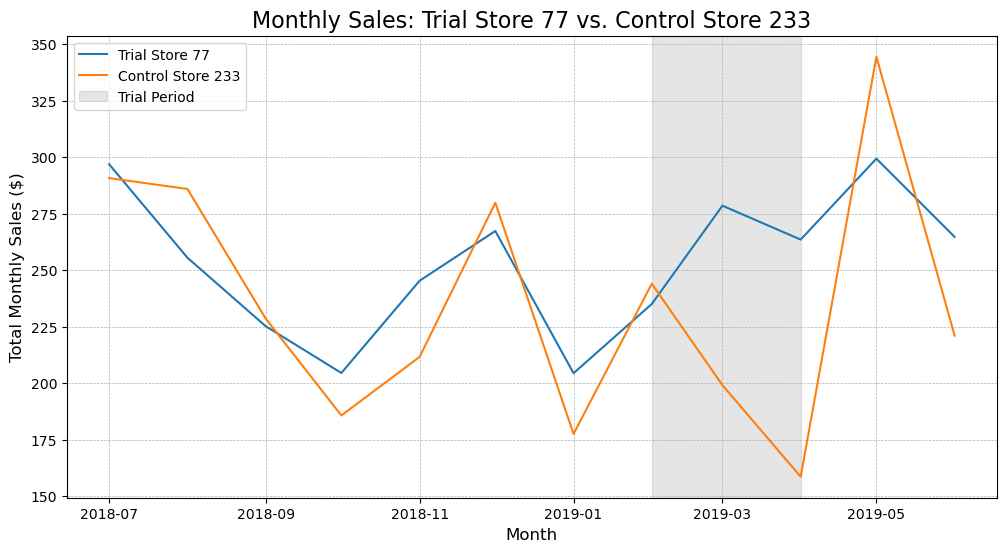

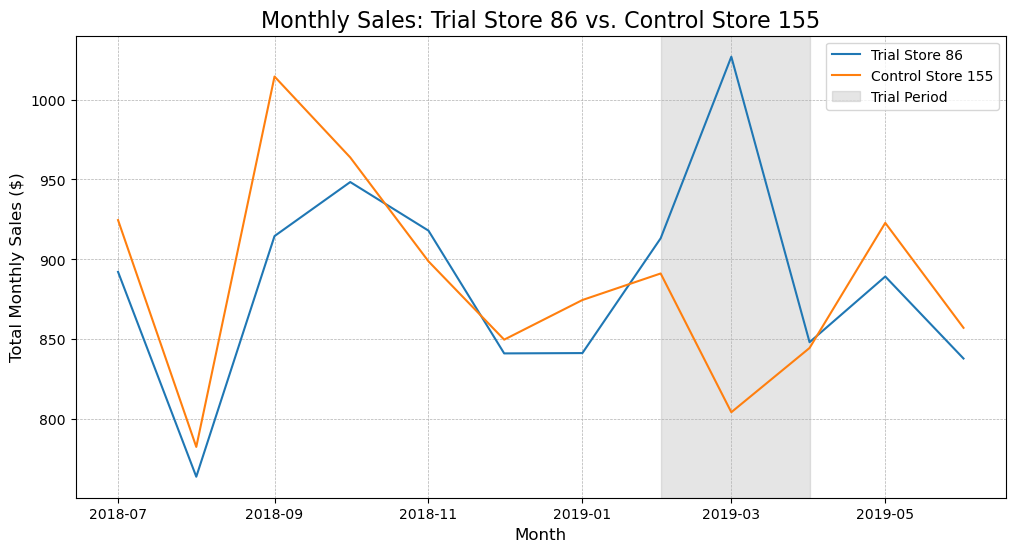

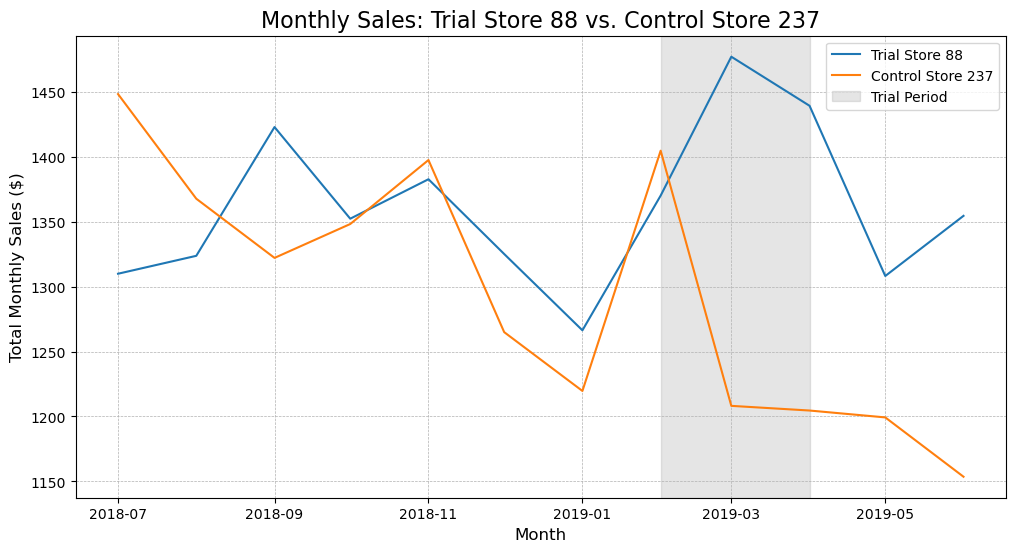

In [23]:
# Visually Compare Performance

# Define our pairs
control_map = {77: 233, 86: 155, 88: 237}

# Loop through each trial store and its chosen control store
for trial_store, control_store in control_map.items():
    plt.figure(figsize=(12, 6))

    # Plot the trial store's sales
    plt.plot(
        monthly_metrics[monthly_metrics['STORE_NBR'] == trial_store]['YEAR_MONTH'].dt.to_timestamp(),
        monthly_metrics[monthly_metrics['STORE_NBR'] == trial_store]['monthly_sales'],
        label=f'Trial Store {trial_store}'
    )

    # Plot the control store's sales
    plt.plot(
        monthly_metrics[monthly_metrics['STORE_NBR'] == control_store]['YEAR_MONTH'].dt.to_timestamp(),
        monthly_metrics[monthly_metrics['STORE_NBR'] == control_store]['monthly_sales'],
        label=f'Control Store {control_store}'
    )

    # Add a vertical line to mark the start of the trial period
    plt.axvspan(
        pd.to_datetime('2019-02'), pd.to_datetime('2019-04'),
        color='grey', alpha=0.2, label='Trial Period'
    )

    # Formatting
    plt.title(f'Monthly Sales: Trial Store {trial_store} vs. Control Store {control_store}', fontsize=16)
    plt.xlabel('Month', fontsize=12)
    plt.ylabel('Total Monthly Sales ($)', fontsize=12)
    plt.legend()
    plt.grid(True, linestyle='--', linewidth=0.5)
    plt.show()

**1. Trial Store 77 vs. Control Store 233**

**Pre-Trial Period (Left of grey area): The sales patterns of the two stores are remarkably similar, tracking each other very closely. This confirms that Store 233 was an excellent choice for a control store.**

**Trial Period (Inside grey area): During the trial, the blue line (Trial Store 77) appears to be consistently above the orange line (Control Store 233). While the control store's sales dip in March, the trial store's sales remain relatively strong.**

**Initial Assessment: This looks like a successful trial. There appears to be a positive sales uplift.**


**2. Trial Store 86 vs. Control Store 155**

**Pre-Trial Period: The sales patterns track each other reasonably well, confirming a decent match.**

**Trial Period: During the trial, the blue line (Trial Store 86) shows a significant spike in sales, particularly in March, while the control store's sales decline.**

**Initial Assessment: This looks like a very successful trial. The visual evidence for a sales uplift is strong.**

**3. Trial Store 88 vs. Control Store 237**

**Pre-Trial Period: The sales patterns are very closely correlated, confirming an excellent control store choice.**

**Trial Period: During the trial, the blue line (Trial Store 88) seems to diverge and stay above the orange line (Control Store 237). The control store's sales drop off sharply, while the trial store maintains a higher level of sales.**

**Initial Assessment: This also looks like a successful trial.**

**Overall Conclusion: The visual evidence suggests that the new store layout had a positive impact on sales in all three trial locations. However, to make a formal recommendation, we must confirm this with statistical testing.**

**Statistical Assessment of the Trial**

In [24]:
from scipy import stats

In [25]:
# Define our pairs again
control_map = {77: 233, 86: 155, 88: 237}

for trial_store, control_store in control_map.items():
    print(f"--- Assessment for Trial Store {trial_store} ---")

    # Filter data for the trial and control stores during the trial period
    trial_sales = trial_period_data[trial_period_data['STORE_NBR'] == trial_store]['monthly_sales']
    control_sales = trial_period_data[trial_period_data['STORE_NBR'] == control_store]['monthly_sales']

    # Calculate percentage difference in total sales
    diff = trial_sales.sum() - control_sales.sum()
    pct_diff = (diff / control_sales.sum()) * 100
    print(f"Total sales uplift: {pct_diff:.2f}%")

    # Perform independent t-test
    t_stat, p_value = stats.ttest_ind(trial_sales, control_sales)
    print(f"T-statistic: {t_stat:.4f}, P-value: {p_value:.4f}")

    # Interpret the result
    if p_value < 0.05:
        print("The difference is statistically significant.\n")
    else:
        print("The difference is NOT statistically significant.\n")

--- Assessment for Trial Store 77 ---
Total sales uplift: 29.13%
T-statistic: 2.1044, P-value: 0.1031
The difference is NOT statistically significant.

--- Assessment for Trial Store 86 ---
Total sales uplift: 9.76%
T-statistic: 1.4277, P-value: 0.2266
The difference is NOT statistically significant.

--- Assessment for Trial Store 88 ---
Total sales uplift: 12.29%
T-statistic: 2.1370, P-value: 0.0994
The difference is NOT statistically significant.



**The "Uplift" Numbers: At first glance, the results look positive. The trial stores showed a total sales uplift of 29.13%, 9.76%, and 12.29% respectively compared to their control stores during the trial period. This seems like a clear win.**

**The P-Value Tells the Real Story: However, the crucial metric here is the p-value. In statistics, a common threshold for "significance" is a p-value of less than 0.05.**

**Store 77: p-value = 0.1031**

**Store 86: p-value = 0.2266**

**Store 88: p-value = 0.0994**

**Conclusion: None of the p-values are below 0.05. This means that for all three trials, we cannot conclude that the observed sales uplift is a real effect. The differences are "not statistically significant." In simple terms, it's possible that the observed increase in sales was just due to random chance or normal monthly fluctuations, and not because of the new store layout.**

**Why this Happen:- The main reason is our very small sample size. We are only comparing 3 months of data for the trial store against 3 months of data for the control store. With so few data points, it's very difficult to prove that a difference is real. Even a large percentage uplift can be dismissed as random chance.**

**Conclusion and Recommendation**

**To evaluate the effectiveness of the new store layout, a trial was conducted in stores 77, 86, and 88. For each trial store, a corresponding control store was selected based on its high similarity in monthly sales patterns and volume during the 7-month pre-trial period (July 2018 - January 2019).**

  **A visual comparison of monthly sales during the 3-month trial period (February - April 2019) showed a positive trend, with all three trial stores appearing to outperform their control counterparts. The total sales uplift for the trial period was notable, at 29.1% for store 77, 9.8% for store 86, and 12.3% for store 88.**

  **However, a formal statistical assessment using an independent t-test revealed that these differences were not statistically significant (p-values of 0.10, 0.23, and 0.10 respectively). The primary reason for this is the short duration of the trial (3 months), which provides a very small sample size for statistical testing.**

**Recommendation:**
**While the visual evidence and percentage uplift are encouraging, the lack of statistical significance means we cannot definitively conclude that the new layout caused the increase in sales.**

**Therefore, we recommend extending the trial period for another 3-4 months. This will provide a larger sample size, which will increase the statistical power of our analysis and allow us to determine with much greater confidence whether the observed uplift is a real and repeatable effect. A decision on a full-scale rollout should be deferred until this more robust data is available."**